In [84]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

C:\Users\Hp\AppData\Local\Temp\ipykernel_29708\2055016989.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [85]:
data = pd.read_csv("framingham.csv")

In [86]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [87]:
data = data.fillna(data.mean())

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


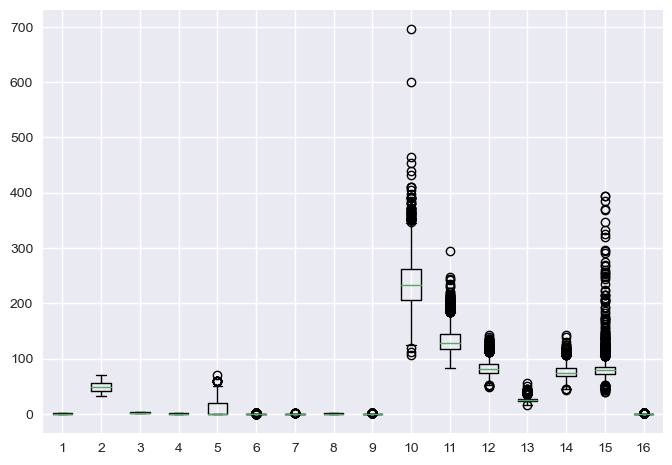

In [89]:
fix , ax = plt.subplots()
ax.boxplot(data)
plt.show()

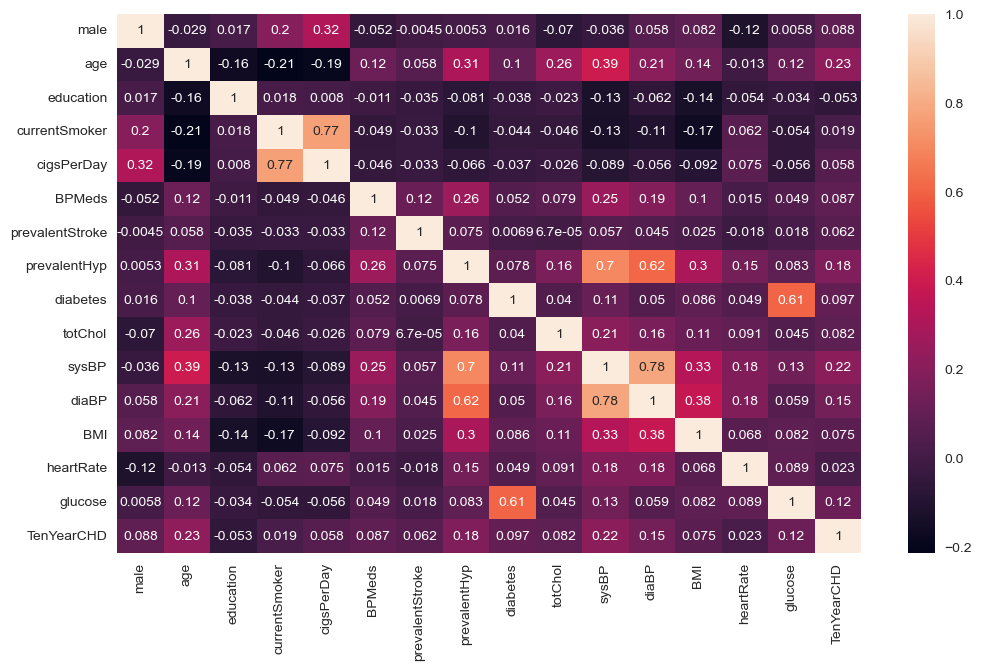

In [90]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr() , annot = True)
plt.show()

In [91]:
def outlier(data):
    
    q1 = np.percentile(data , 25)
    q3 = np.percentile(data , 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    filtered_data = data[(data>= lower_bound) &(data<= upper_bound)]
    
    return filtered_data

In [92]:
new_data = outlier(data)

In [93]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          471 non-null    float64
 10  sysBP            4120 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4201 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [94]:
new_data = new_data.fillna(new_data.median())

In [95]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


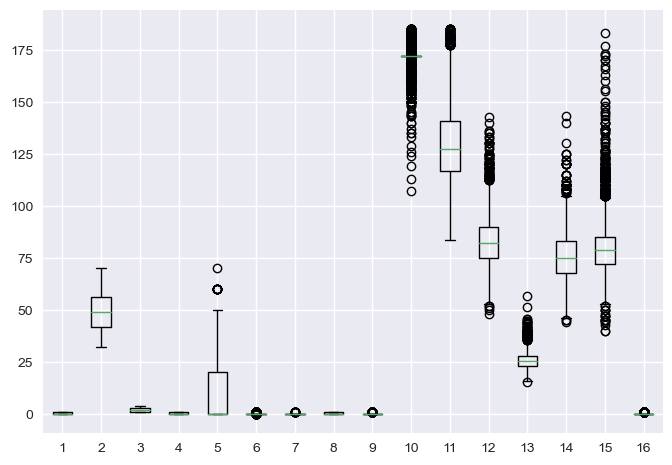

In [96]:
fix , ax = plt.subplots()
ax.boxplot(new_data)
plt.show()

In [97]:
new_data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [98]:
X = new_data[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes',  'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']]
y = new_data['TenYearCHD']

In [99]:
def featurescaling(X):
    Xmean = X.mean(axis=0)
    Xstd = X.std(axis=0)
    
    return (X-Xmean)/Xstd

In [100]:
X = featurescaling(X)

C:\Users\Hp\AppData\Local\Temp\ipykernel_29708\318978872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['age'] , hist = True)


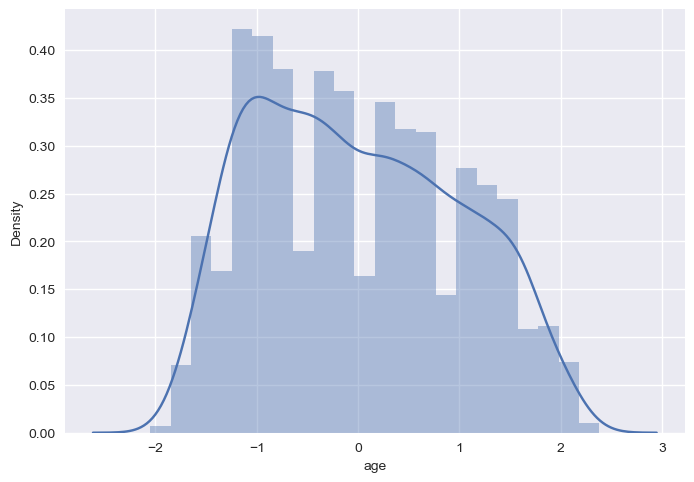

In [101]:
sns.distplot(X['age'] , hist = True)
plt.show()

In [102]:
X.std(axis=0),X.mean(axis=0)

(male               1.0
 age                1.0
 education          1.0
 currentSmoker      1.0
 cigsPerDay         1.0
 BPMeds             1.0
 prevalentStroke    1.0
 prevalentHyp       1.0
 diabetes           1.0
 sysBP              1.0
 diaBP              1.0
 BMI                1.0
 heartRate          1.0
 glucose            1.0
 dtype: float64,
 male               1.173619e-17
 age                1.408343e-16
 education          6.748312e-17
 currentSmoker      8.382996e-18
 cigsPerDay        -1.089789e-16
 BPMeds            -2.347239e-17
 prevalentStroke   -1.005960e-17
 prevalentHyp      -4.862138e-17
 diabetes           0.000000e+00
 sysBP             -4.761542e-16
 diaBP              2.984347e-16
 BMI                9.456019e-16
 heartRate          1.193739e-15
 glucose            2.950815e-16
 dtype: float64)

In [103]:
Xtrain , Xtest , ytrain , ytest = train_test_split(X,y)

In [104]:
model = LogisticRegression(multi_class = 'ovr')

In [105]:
model.fit(Xtrain,ytrain)

LogisticRegression(multi_class='ovr')

In [106]:
model.predict(Xtest)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
model.score(Xtest,ytest)

0.8594339622641509

In [108]:
model.score(Xtrain,ytrain)

0.8489616110761485